<a href="https://colab.research.google.com/github/LoTzuChin/113-1-FinancialBigData/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import yfinance as yf
import pandas as pd
import datetime as dt

stock_id = "2330.tw"

end = dt.date.today()
start = end - dt.timedelta(days=360)

df = yf.download(stock_id, start = start, end = end).reset_index()

close_prices = df['Close']

train_size = int(len(close_prices) * 0.8)
train, test = close_prices[0:train_size], close_prices[train_size:]

print("")
print(f"train size: {len(train)}")
print(f"test size: {len(test)}")

[*********************100%***********************]  1 of 1 completed


train size: 189
test size: 48


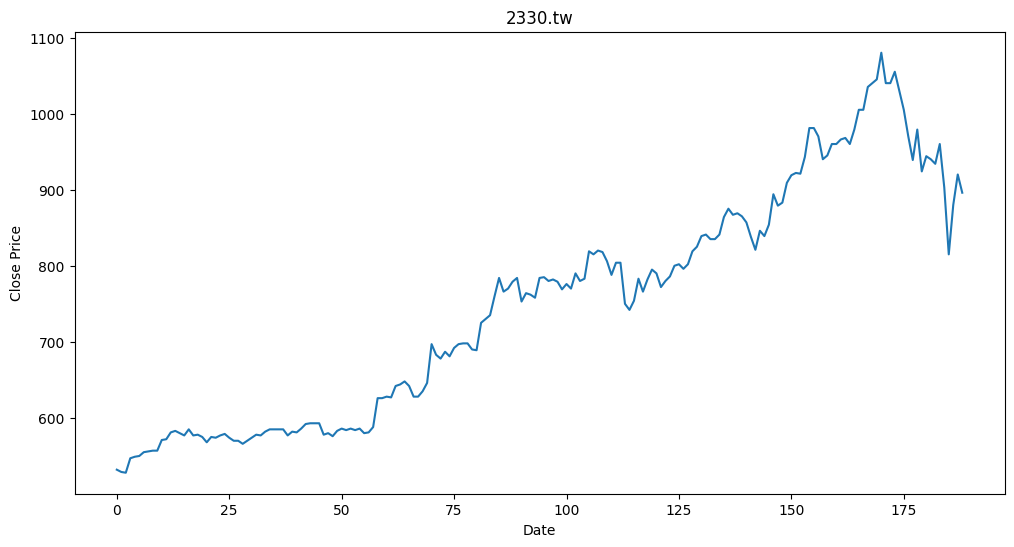

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train)
plt.title("2330.tw")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

**ADF檢定-檢查平穩性**

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print("ADF統計量：", result[0])
print("p-value：", result[1])

ADF統計量： -1.028691394933408
p-value： 0.7426564896378557


差分檢定(當數據非平穩，進行一階微分)

In [20]:
data_diff = train.diff().dropna()

result = adfuller(data_diff)
print("ADF統計量(差分後)：", result[0])
print("p-value(差分後)：", result[1])

ADF統計量(差分後)： -4.304204506830921
p-value(差分後)： 0.0004368238397214884


In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def optimize_arima(train, p_value, d_value, q_value):
  best_score, best_cfg = float("inf"), None
  best_model = None

  for p in p_value:
    for d in d_value:
      for q in q_value:
        try:
          model = ARIMA(train, order=(p, d, q))
          model_fit = model.fit()
          yhat = model_fit.forecast(steps=len(test))
          error = mean_squared_error(test, yhat)
          if error < best_score:
            best_score, best_cfg = error, (p, d, q)
            best_model = model_fit
        except:
          continue

  return best_cfg, best_model

p_value = range(0, 6)
d_value = range(0, 3)
q_value = range(0, 6)

best_cfg, best_model = optimize_arima(train, p_value, d_value, q_value)
print("最佳參數：", best_cfg)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

最佳參數： (2, 2, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
from math import sqrt

yhat = best_model.forecast(steps=len(test))

rmse_optimized = sqrt(mean_squared_error(test, yhat))

print("最佳模型的RMSE：", rmse_optimized)

最佳模型的RMSE： 38.07691390414861


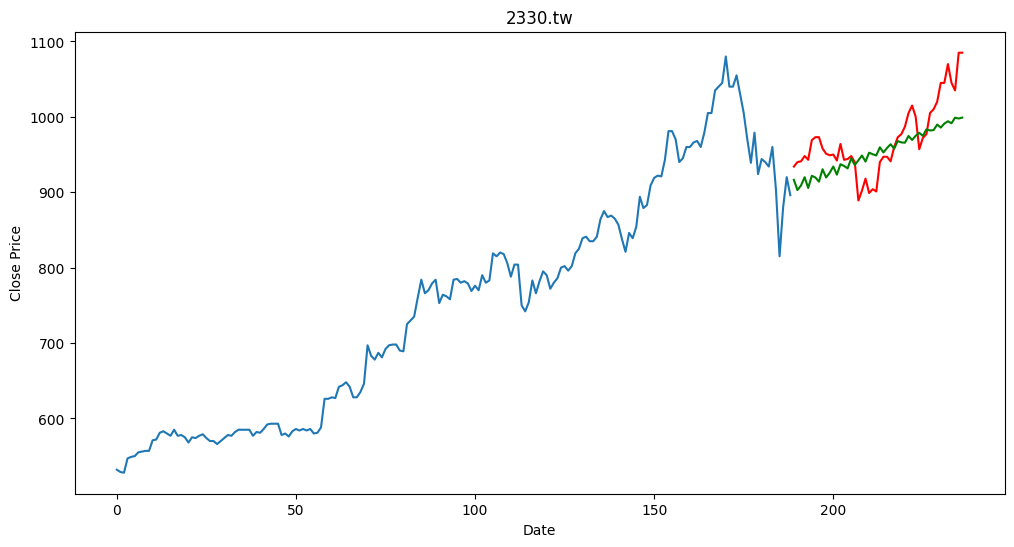

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(train)
plt.plot(test, color='red')
plt.plot(yhat, color='green')
plt.title("2330.tw")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [26]:
ar1_model = ARIMA(train, order=(1, 1, 0)).fit()
ar1_predict = ar1_model.forecast(steps=len(test))
ar1_rmse = sqrt(mean_squared_error(test, ar1_predict))
print("ARIMA(1, 1, 0)的RMSE：", ar1_rmse)

ar2arma_model = ARIMA(train, order=(2, 1, 1)).fit()
ar2arma_predict = ar2arma_model.forecast(steps=len(test))
ar2arma_rmse = sqrt(mean_squared_error(test, ar2arma_predict))
print("ARIMA(2, 1, 1)的RMSE：", ar2arma_rmse)

ar3_model = ARIMA(train, order=(3, 1, 0)).fit()
ar3_predict = ar3_model.forecast(steps=len(test))
ar3_rmse = sqrt(mean_squared_error(test, ar3_predict))
print("ARIMA(3, 1, 0)的RMSE：", ar3_rmse)

ar4_model = ARIMA(train, order=(2, 2, 3)).fit()
ar4_predict = ar4_model.forecast(steps=len(test))
ar4_rmse = sqrt(mean_squared_error(test, ar4_predict))
print("ARIMA(2, 2, 3)的RMSE：", ar4_rmse)

ARIMA(1, 1, 0)的RMSE： 87.18612678565592
ARIMA(2, 1, 1)的RMSE： 84.2735853525323
ARIMA(3, 1, 0)的RMSE： 81.21487252873546
ARIMA(2, 2, 3)的RMSE： 38.07691390414861
